# Análisis de Marketing Digital

Este notebook muestra un análisis de datos de campañas de marketing digital.
Incluye:
- Lectura de dataset real (`Excel`) de conversiones, clics y costes.
- Cálculo de **métricas** clave (KPIs) como total conversiones, ratio de conversión, coste total y clics por campaña.
- Visualización de resultados mediante gráficos de barras con anotaciones.
- Preparación de gráficos para portfolio/GitHub.

Autor: Almudena Lorca
Fecha: 2025

In [16]:
# 1️⃣ Clonar el repo de nuevo al inicio del notebook
!git clone https://github.com/almu81/portfolio_analisis.git

# 2️⃣ Confirmar los archivos
!ls portfolio_analisis

# 3️⃣ Leer el Excel con la ruta exacta
import pandas as pd
df = pd.read_excel("portfolio_analisis/Tabla de Hechos Marketing PBI 225(1).xlsx")
df.head()

fatal: destination path 'portfolio_analisis' already exists and is not an empty directory.
 images   README.md  'Tabla de Hechos Marketing PBI 225(1).xlsx'


,Grupo de anuncios,Audiencia: Edad,Audiencia: País,Audiencia: Tipo de dispositivo,Audiencia: Género,Campaña: Tipo de canal publicitario,Campaña: Nombre de campaña,Σ Conversiones: Valor total de conversiones,Conversiones: Categoría de acción de conversión,Conversiones: Nombre de acción de conversión,...,Σ Coste: Importe gastado,Dimensión: Fecha,Dimensión: Fuente,Σ Rendimiento: Total de conversiones,Σ Rendimiento: Clics,Σ Rendimiento: Conversiones,Σ Rendimiento: Impresiones,Σ Vídeo: Visualizaciones,CPC (Coste por clic),CPV (Coste por visualización)
0,Leads Potenciales,35-44,Argentina,Tablet,Femenino,Video,Black Friday,1510.72,Registro,Descarga App,...,378.43,2021-09-20,Google,90,37708,45,298050,11122,0.0100,0.0340
1,Segmento Interesados,45-54,Colombia,Móvil,Masculino,Video,Reactivación,1637.19,Registro,Formulario Contacto,...,584.17,2021-12-21,YouTube,136,25371,105,278607,10782,0.0230,0.0542
2,Clientes Frecuentes,45-54,México,Ordenador,Femenino,Social,Black Friday,2267.44,Registro,Descarga App,...,552.12,2021-04-24,Instagram,65,36604,66,255902,12616,0.0151,0.0438
3,Clientes Frecuentes,35-44,España,Móvil,Femenino,Display,Promo Verano,2396.57,Compra,Descarga App,...,548.72,2021-11-25,Google,83,34227,116,325341,9062,0.0160,0.0606
4,Segmento Interesados,35-44,Argentina,Tablet,Femenino,Búsqueda,Black Friday,1916.32,Descarga,Suscripción Newsletter,...,569.43,2021-01-26,Google,108,29806,75,377852,12212,0.0191,0.0466


2️⃣ Librerías y lectura de **datos**

In [17]:
import pandas as pd

# Leer el Excel directamente desde la carpeta clonada
df = pd.read_excel("portfolio_analisis/Tabla de Hechos Marketing PBI 225(1).xlsx")

# Primer vistazo
df.head()        # primeras 5 filas
df.info()        # tipos de datos y nulos
df.describe()    # estadísticas descriptivas de columnas numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2120 entries, 0 to 2119
Data columns (total 21 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Grupo de anuncios                                2120 non-null   object 
 1   Audiencia: Edad                                  2120 non-null   object 
 2   Audiencia: País                                  2120 non-null   object 
 3   Audiencia: Tipo de dispositivo                   2120 non-null   object 
 4   Audiencia: Género                                2120 non-null   object 
 5   Campaña: Tipo de canal publicitario              2120 non-null   object 
 6   Campaña: Nombre de campaña                       2120 non-null   object 
 7   Σ Conversiones: Valor total de conversiones      2120 non-null   float64
 8   Conversiones: Categoría de acción de conversión  2120 non-null   object 
 9   Conversiones: Nombre de acción

,Σ Conversiones: Valor total de conversiones,Σ Conversiones: Valor de conversiones,Σ Coste: Importe gastado,Σ Rendimiento: Total de conversiones,Σ Rendimiento: Clics,Σ Rendimiento: Conversiones,Σ Rendimiento: Impresiones,Σ Vídeo: Visualizaciones,CPC (Coste por clic),CPV (Coste por visualización)
count,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000,2120.000000
mean,2016.270646,1006.855335,501.582642,114.208019,30283.830660,86.988679,270403.232547,11422.482547,0.017219,0.046575
std,614.443246,310.414884,154.259280,38.401958,9221.332529,34.402386,102290.874098,3857.630102,0.004858,0.014702
min,800.630000,400.640000,200.470000,40.000000,12000.000000,24.000000,80800.000000,4006.000000,0.008500,0.021000
25%,1518.220000,760.740000,377.242500,85.000000,22946.750000,60.000000,188299.750000,8450.250000,0.013600,0.035500
50%,2011.115000,992.155000,499.440000,112.000000,30278.500000,81.000000,259908.000000,11209.500000,0.016600,0.044100
75%,2455.760000,1238.112500,614.552500,143.000000,36741.250000,113.250000,348811.250000,14232.250000,0.020300,0.055700
max,3389.490000,1698.590000,849.710000,203.000000,50911.000000,169.000000,509960.000000,20390.000000,0.032900,0.097300


3️⃣ Cálculo de **KPIs**

In [18]:
df['ratio_conversiones'] = df['Σ Rendimiento: Conversiones'] / df['Σ Rendimiento: Clics']
df[['Campaña: Nombre de campaña', 'Σ Rendimiento: Conversiones', 'Σ Rendimiento: Clics', 'ratio_conversiones']].head()

,Campaña: Nombre de campaña,Σ Rendimiento: Conversiones,Σ Rendimiento: Clics,ratio_conversiones
0,Black Friday,45,37708,0.001193
1,Reactivación,105,25371,0.004139
2,Black Friday,66,36604,0.001803
3,Promo Verano,116,34227,0.003389
4,Black Friday,75,29806,0.002516


4️⃣ Total de conversiones por **campaña**

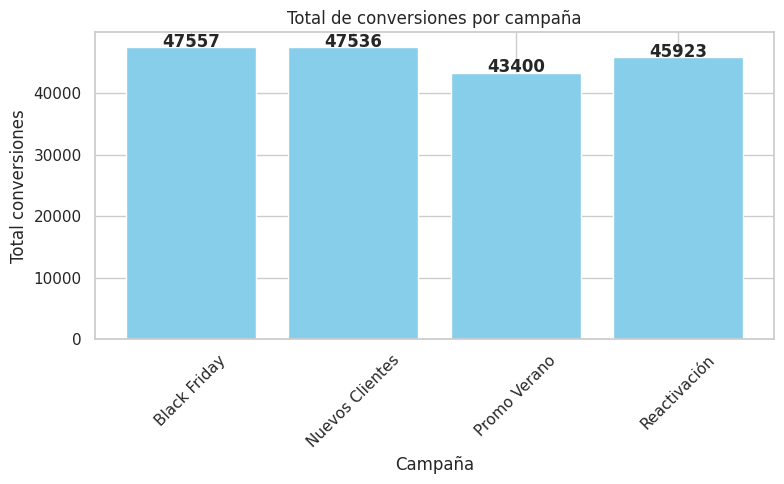

In [19]:
import matplotlib.pyplot as plt

# Agrupamos por campaña
df_conversiones = df.groupby('Campaña: Nombre de campaña')['Σ Rendimiento: Conversiones'].sum().reset_index()

# Gráfico
plt.figure(figsize=(8,5))
plt.bar(df_conversiones['Campaña: Nombre de campaña'], df_conversiones['Σ Rendimiento: Conversiones'], color='skyblue')

# Añadimos cantidades encima de cada barra
for i, v in enumerate(df_conversiones['Σ Rendimiento: Conversiones']):
    plt.text(i, v + 5, str(v), ha='center', fontweight='bold')

plt.title('Total de conversiones por campaña')
plt.xlabel('Campaña')
plt.ylabel('Total conversiones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('portfolio_analisis/images/total_conversiones_campaña.png')  # Guardamos
plt.show()

5️⃣ Ratio total de conversiones por **campaña**

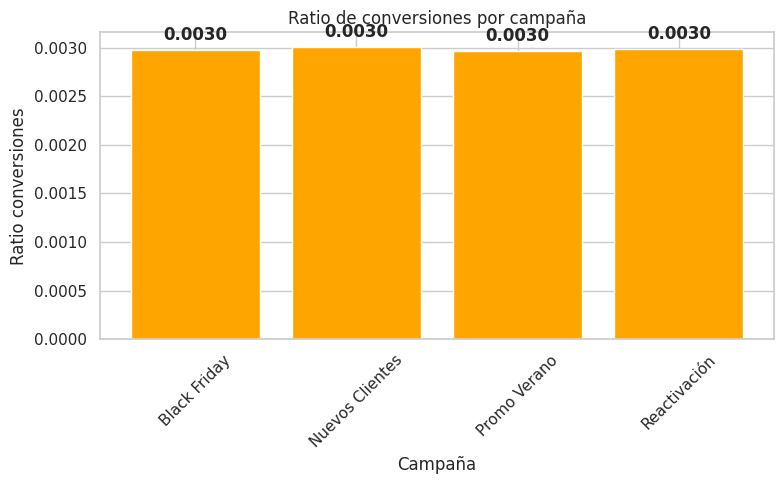

In [20]:
df_ratio = df.groupby('Campaña: Nombre de campaña')['ratio_conversiones'].mean().reset_index()

plt.figure(figsize=(8,5))
plt.bar(df_ratio['Campaña: Nombre de campaña'], df_ratio['ratio_conversiones'], color='orange')

# Añadimos cantidades encima de cada barra
for i, v in enumerate(df_ratio['ratio_conversiones']):
    plt.text(i, v + 0.0001, f'{v:.4f}', ha='center', fontweight='bold')

plt.title('Ratio de conversiones por campaña')
plt.xlabel('Campaña')
plt.ylabel('Ratio conversiones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('portfolio_analisis/images/ratio_conversiones_campaña.png')  # Guardamos
plt.show()

6️⃣ Clics y coste total por **campaña**

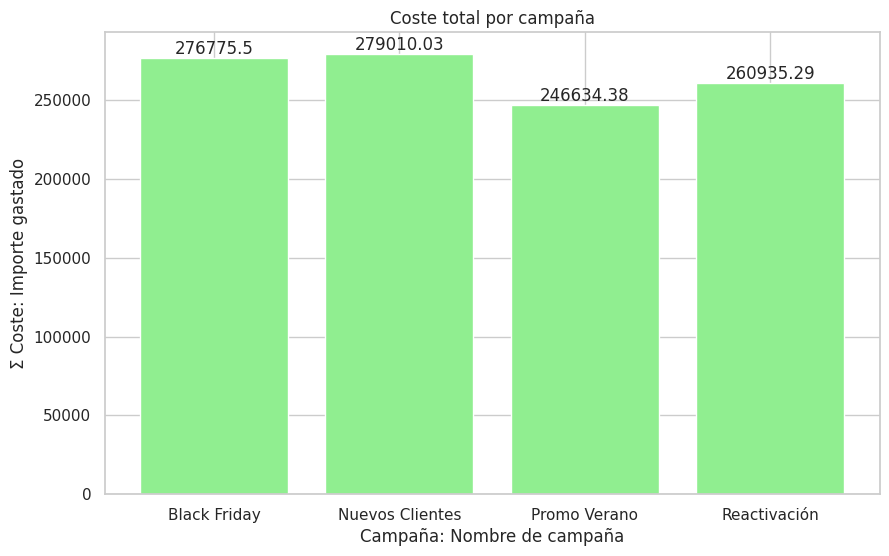

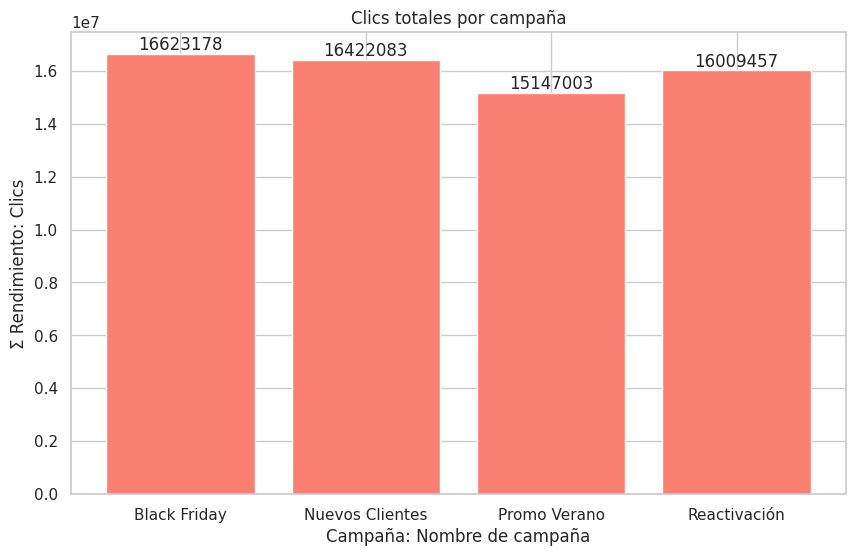

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Función para graficar y guardar
def graficar_barras(df, columna_x, columna_y, titulo, color, nombre_archivo):
    plt.figure(figsize=(10,6))
    barras = plt.bar(df[columna_x], df[columna_y], color=color)
    plt.title(titulo)
    plt.xlabel(columna_x)
    plt.ylabel(columna_y)

    # Mostrar valores encima de cada barra
    for barra in barras:
        yval = barra.get_height()
        plt.text(barra.get_x() + barra.get_width()/2, yval, round(yval,2), ha='center', va='bottom')

    # Guardar la imagen
    plt.savefig(f"portfolio_analisis/images/{nombre_archivo}")
    plt.show()

# 1. Coste total por campaña
df_coste = df.groupby('Campaña: Nombre de campaña')['Σ Coste: Importe gastado'].sum().reset_index()
graficar_barras(df_coste, 'Campaña: Nombre de campaña', 'Σ Coste: Importe gastado',
                'Coste total por campaña', 'lightgreen', 'coste_total_campaña.png')

# 2. Clics por campaña
df_clics = df.groupby('Campaña: Nombre de campaña')['Σ Rendimiento: Clics'].sum().reset_index()
graficar_barras(df_clics, 'Campaña: Nombre de campaña', 'Σ Rendimiento: Clics',
                'Clics totales por campaña', 'salmon', 'clics_total_campaña.png')


## 7️⃣ Conclusiones

- Se han visualizado las conversiones, clics y costes por campaña.
- Se observa que algunas campañas generan muchas impresiones pero pocas conversiones.
- Próximos pasos: analizar ratios por segmento de audiencia y optimizar campañas según resultados.